# Creating Nitrogen, oxygen, and nitrogen ternary air system phase envelope

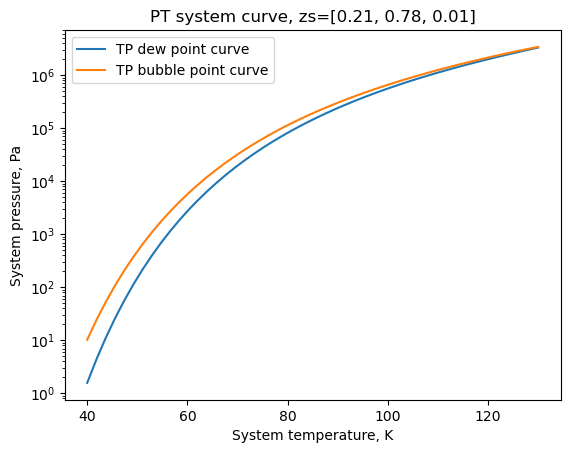

In [1]:
from thermo import ChemicalConstantsPackage, CEOSGas, CEOSLiquid, PRMIX, FlashVL
from thermo.interaction_parameters import IPDB

constants, properties = ChemicalConstantsPackage.from_IDs(['oxygen', 'nitrogen', 'argon'])
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')
eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs, 'omegas': constants.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases)
liquid = CEOSLiquid(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases)
flasher = FlashVL(constants, properties, liquid=liquid, gas=gas)
zs = [0.21, 0.78, 0.01]
_ = flasher.plot_TP(zs, Tmin=40, Tmax=130, show=True)

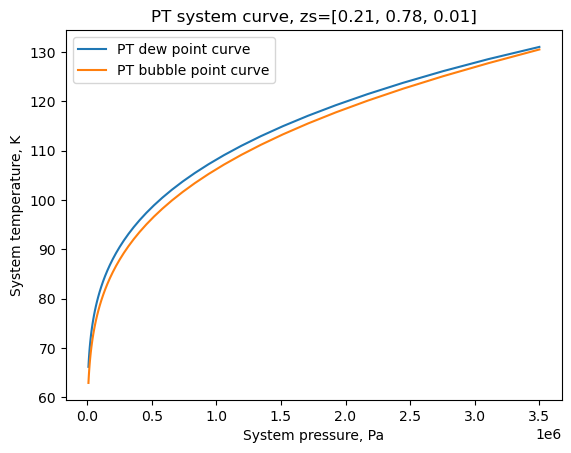

In [2]:
_ = flasher.plot_PT(zs, Pmin=1e4, Pmax=3.5e6, show=True)

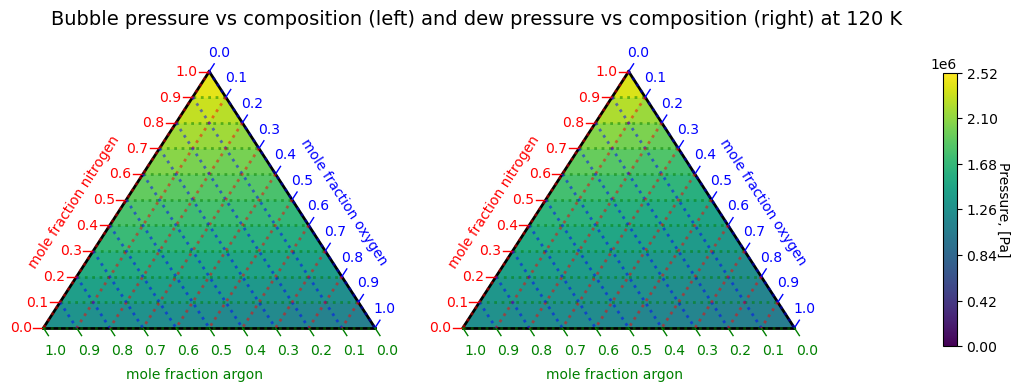

In [3]:
flasher.plot_ternary(T=120)

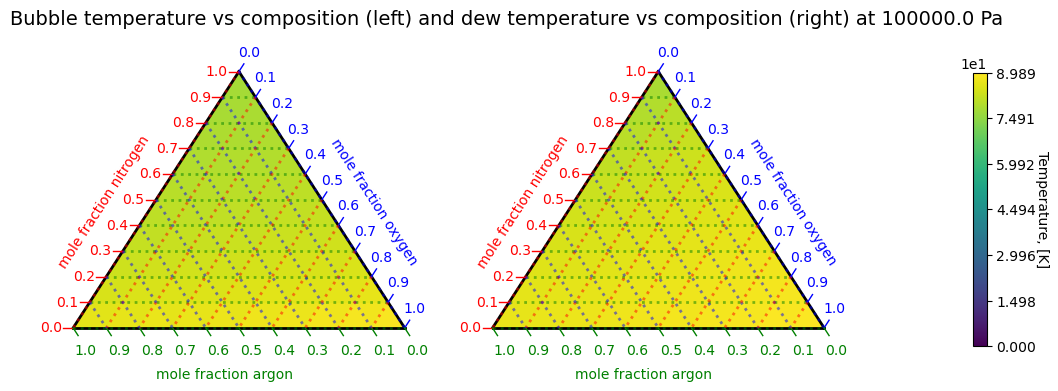

In [4]:
flasher.plot_ternary(P=1e5)

**Note: Bubble and dew point calculations can be difficult to converge; not all systems will solve for all conditions. Not all flash specifications have a unique solution. You are welcome to send these cases to the author but the library is provided AS IS, with NO SUPPORT.** 